<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# write your code here
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
# write your code here
# load the excel file
# store the data in 'df_prod'
df = pd.read_csv('Nutrients.csv')

# display first five observations using head()
df.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


The first column in the dataset corresponds to the different food items and the remaining columns record the amount of nutrients present in that food.

**The data definition is as follows:** <br>

**Food**: Name of the food item

**Calories**: Calories present in the food (in kcal)

**Fat**: Fat present in the food (in g)

**Sodium**: Sodium present in the food (in mg)

**Potassium**: Potassium present in the food (in mg)	

**Carbohydrate**: Carbohydrate present in the food (in g)	

**Protein**: Protein present in the food (in g)

**Vitamin A**: Vitamin A present in the food (in mg)	

**Vitamin C**: Vitamin C present in the food (in mg)

**Calcium**: Calcium present in the food (in mg)

**Iron**: Iron present in the food (in mg)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Set the name of the food item as the identifier for each observation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
import pandas as pd

# Assuming df is your DataFrame
df.set_index('Food', inplace=True)

# Display the updated DataFrame
print(df.head())


                Calories   Fat  Sodium  Potassium  Carbohydrate  Protein  \
Food                                                                       
Honeydew_Melon        36  0.14      18        228          9.00     0.54   
Potato                77  0.09       6        421         17.00     2.00   
Sweet Corn            86  1.18      15        270         19.00     3.20   
Celery                16  0.17      80        260          2.79     0.69   
Pomegranates          83  1.17       3        236         18.70     1.67   

                Vitamin A  Vitamin C  Calcium  Iron  
Food                                                 
Honeydew_Melon      34.00       18.0      6.0  0.17  
Potato               1.34       19.7     12.0  0.78  
Sweet Corn           0.00        6.8      2.0  0.52  
Celery               0.00        3.1     40.0  0.20  
Pomegranates         0.00       10.2     10.0  0.30  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot the distribution of all the numerical variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

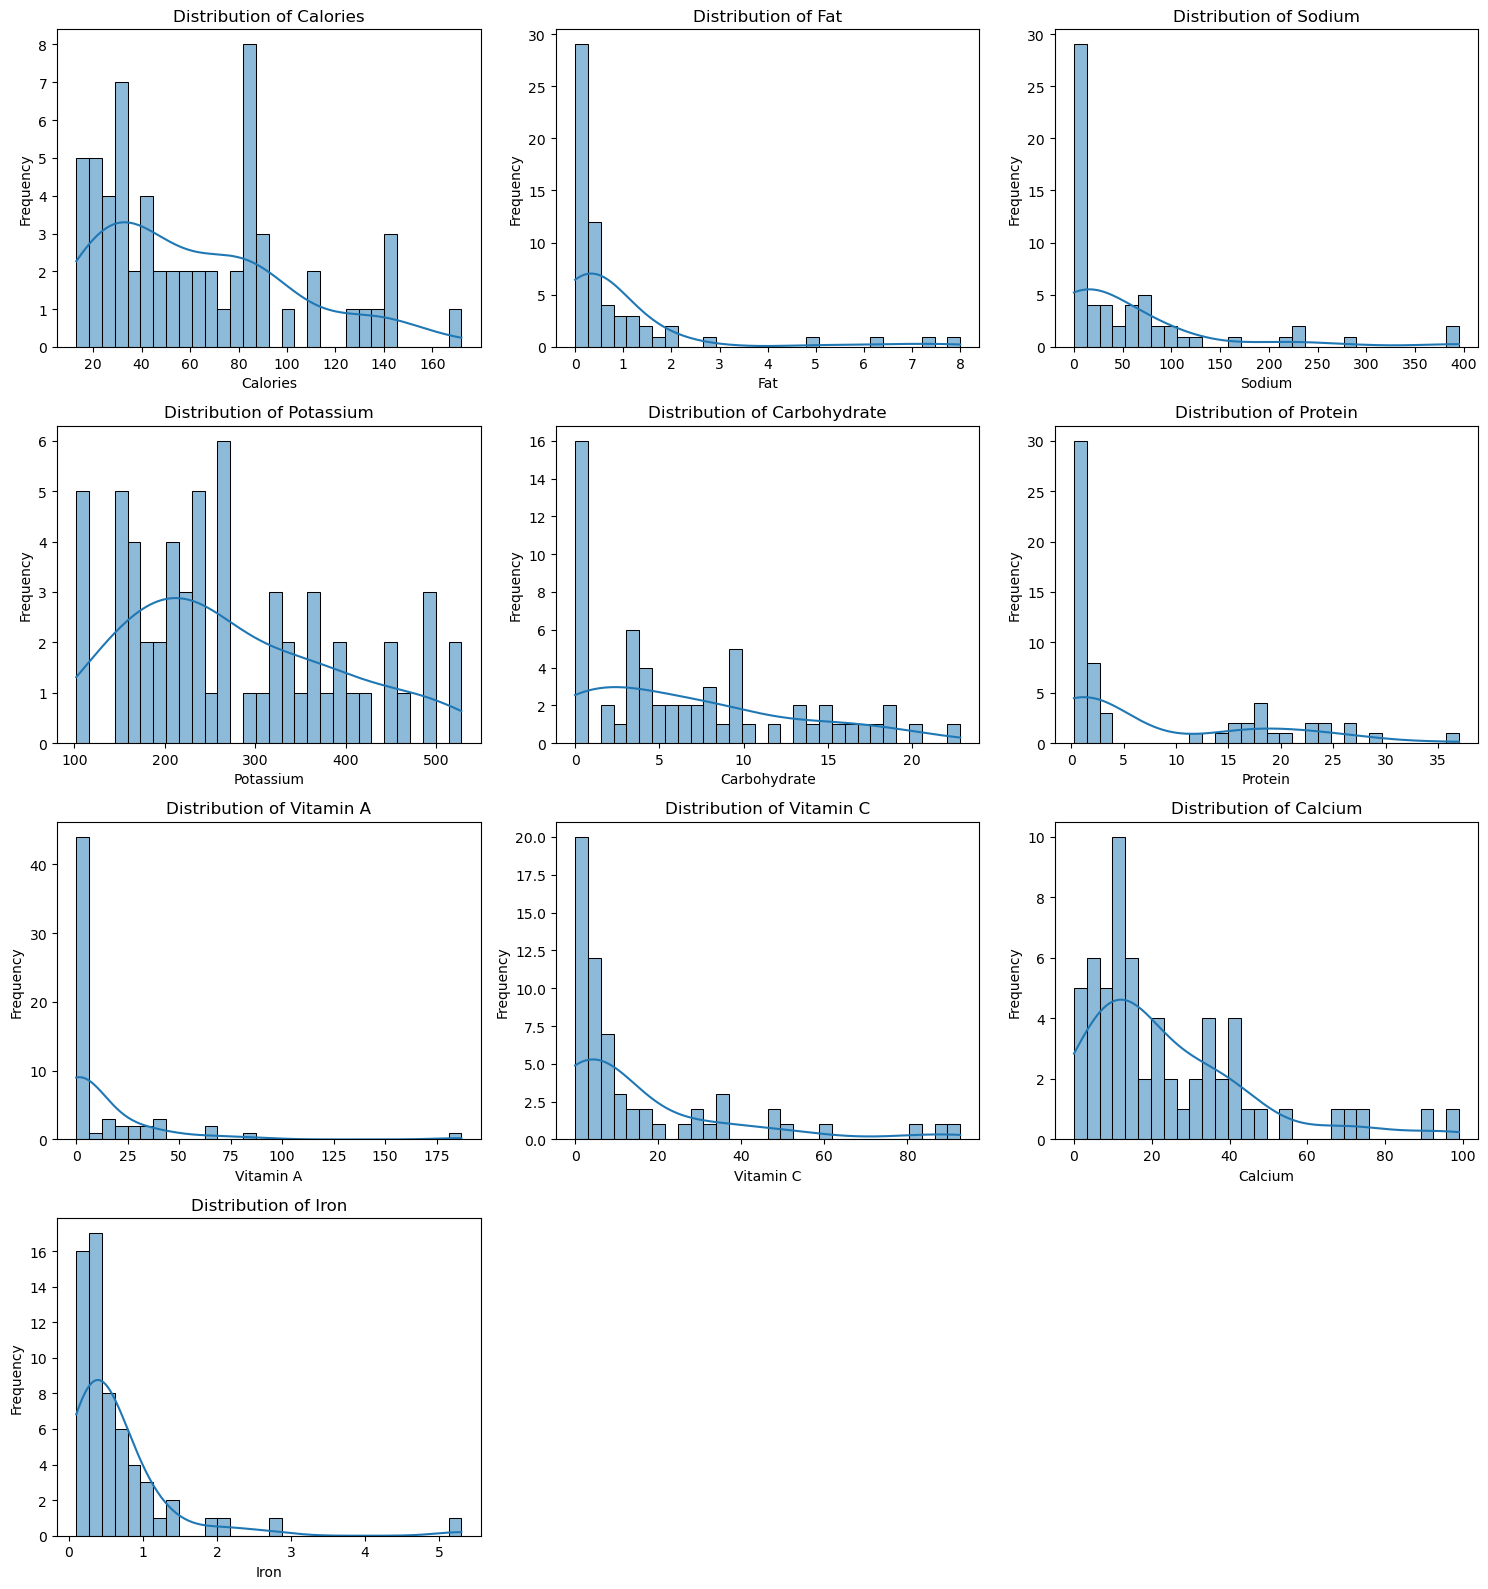

Skewness of numerical variables:
Calories        0.808495
Fat             3.171910
Sodium          2.388477
Potassium       0.547614
Carbohydrate    0.749938
Protein         1.148104
Vitamin A       4.038096
Vitamin C       2.064940
Calcium         1.607351
Iron            4.030451
dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Determine the number of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numerical_columns)

# Calculate number of rows and columns for subplots
ncols = 3  # You can set this to any number you prefer
nrows = (num_columns // ncols) + (num_columns % ncols > 0)

# Plotting the distribution of each numerical variable
plt.figure(figsize=(ncols * 5, nrows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate skewness
skewness = df[numerical_columns].skew()
print("Skewness of numerical variables:")
print(skewness)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Plot the correlation between the various nutrients. And find the variables with the strongest correlation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

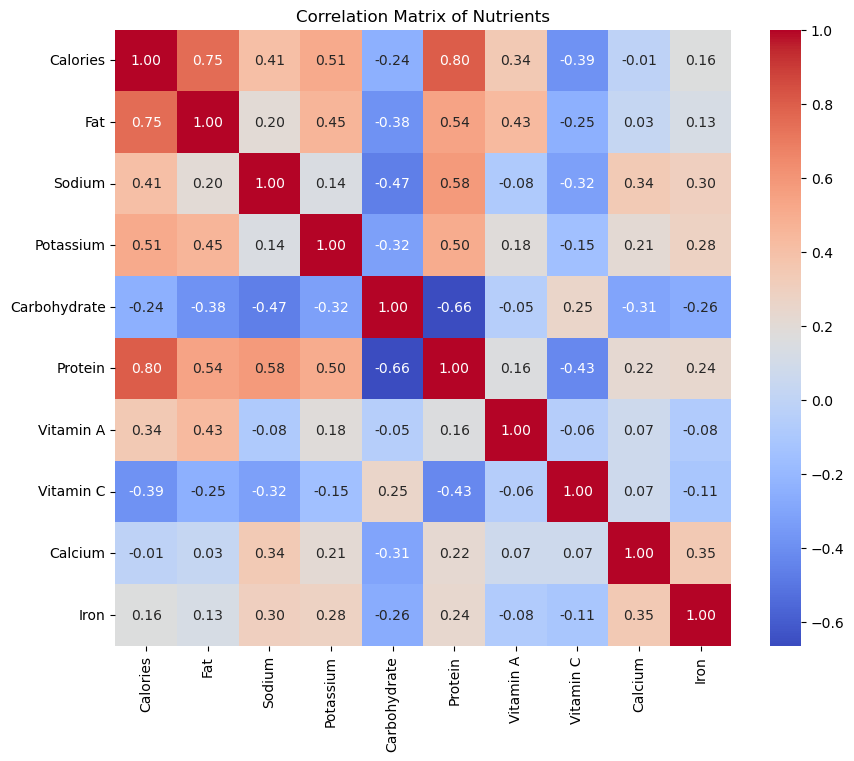

In [5]:
# type your code here
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Nutrients')
plt.show()

In [6]:
# Get the absolute correlation values and find the strongest pairs
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strong_pairs = strong_correlations[(strong_correlations > 0.7) & (strong_correlations < 1)]

print(strong_pairs)


Calories  Protein     0.799613
Fat       Calories    0.752515
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform the appropriate normalization technique to transform the variables to have minimum 0 and maximum 1 value.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame with nutritional data
# Select only the numerical columns for normalization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
print(df_normalized.head())


                Calories      Fat    Sodium  Potassium  Carbohydrate  \
Food                                                                   
Honeydew_Melon  0.144654  0.01750  0.045570   0.295775      0.394046   
Potato          0.402516  0.01125  0.015190   0.748826      0.744308   
Sweet Corn      0.459119  0.14750  0.037975   0.394366      0.831874   
Celery          0.018868  0.02125  0.202532   0.370892      0.122154   
Pomegranates    0.440252  0.14625  0.007595   0.314554      0.818739   

                 Protein  Vitamin A  Vitamin C   Calcium      Iron  
Food                                                                
Honeydew_Melon  0.007621   0.181818   0.194175  0.060606  0.013462  
Potato          0.047360   0.007166   0.212513  0.121212  0.130769  
Sweet Corn      0.080022   0.000000   0.073355  0.020202  0.080769  
Celery          0.011704   0.000000   0.033441  0.404040  0.019231  
Pomegranates    0.038378   0.000000   0.110032  0.101010  0.038462  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Create a dictionary to store the cophenetic correlation coefficient for the following linkage methods: 'Single', 'Complete', and 'Average'. Identify which linkage method works best in quantifying the dissimilarities between the observations.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np


In [9]:
# Assuming `data_normalized` is your normalized DataFrame without the 'Food' index
data_values = df_normalized.values  # Extracting the values as a NumPy array


In [10]:
linkage_methods = ['single', 'complete', 'average']  # List of methods
cophenetic_correlation = {}  # Dictionary to store results


In [11]:
for method in linkage_methods:
    Z = linkage(data_values, method=method)  # Perform clustering
    c, _ = cophenet(Z, pdist(data_values))   # Calculate cophenetic correlation
    cophenetic_correlation[method] = c       # Store the result


In [12]:
print(cophenetic_correlation)  # Show the coefficients


{'single': 0.7909583288433945, 'complete': 0.7750472694670165, 'average': 0.8511247911173967}


In [13]:
best_method = max(cophenetic_correlation, key=cophenetic_correlation.get)
print(f'The best linkage method is: {best_method} with a cophenetic correlation coefficient of {cophenetic_correlation[best_method]}')


The best linkage method is: average with a cophenetic correlation coefficient of 0.8511247911173967


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the dendrogram using the 'ward' linkage method and decide the optimal number of clusters. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

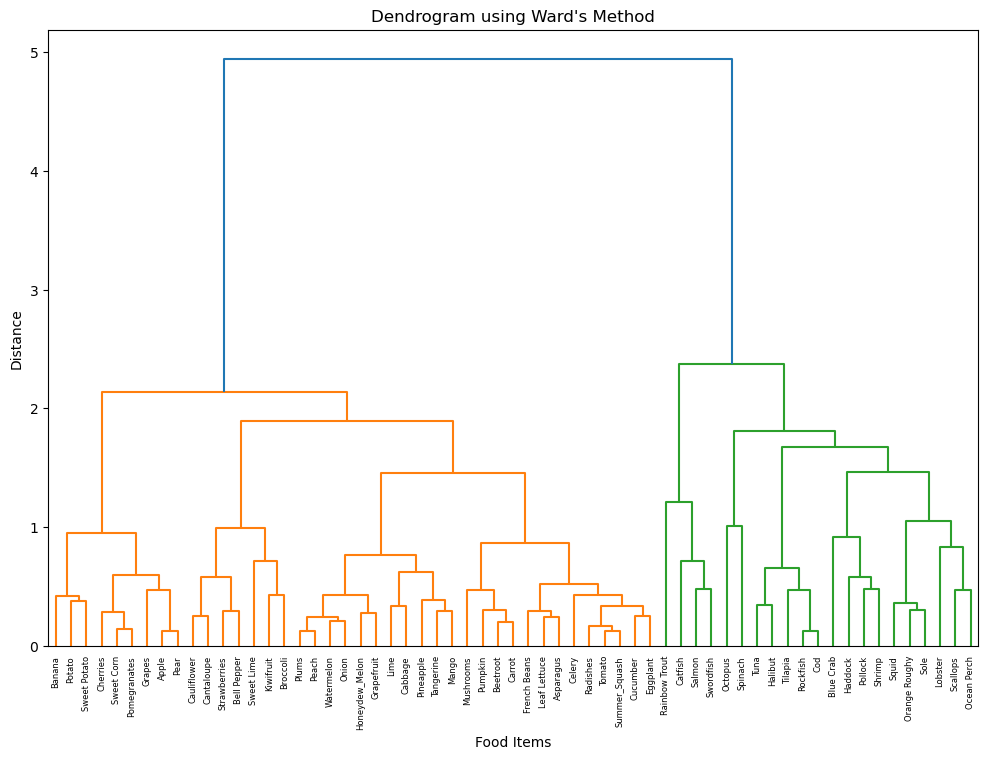

Optimal number of clusters: 1


In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming `data_normalized` is your normalized DataFrame without the 'Food' index
data_values = df_normalized.values

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(data_values, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendro = dendrogram(linkage_matrix, labels=df_normalized.index, leaf_rotation=90)

# Define the threshold for cutting the dendrogram
threshold = 15  # Adjust this value based on your dendrogram observation
plt.axhline(y=threshold, color='red', linestyle='--')

# Annotate distances on the y-axis for distances above the threshold
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3]) / 2  # Average x-coordinate for merging
    y = d[1]  # Distance at which the merging occurs
    if y > threshold:
        plt.plot(x, y, 'o', c=c)  # Plot bullet points
        plt.annotate(f"{y:.2f}", (x, y), xytext=(0, -5), textcoords='offset points', 
                     va='top', ha='center')  # Annotate distance

plt.title('Dendrogram using Ward\'s Method')
plt.xlabel('Food Items')
plt.ylabel('Distance')

# Show the plot
plt.show()

# Determine the number of clusters based on the cut-off
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage_matrix, threshold, criterion='distance')
n_clusters = len(set(clusters))  # Unique cluster labels
print(f'Optimal number of clusters: {n_clusters}')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build the optimal number of clusters as per the previous question and interpret them.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
from scipy.cluster.hierarchy import fcluster

# Set a new threshold based on your observations
threshold = 8  # Adjust if necessary

# Create clusters
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the normalized DataFrame
df_normalized['Cluster'] = clusters

# Display the number of items in each cluster
cluster_counts = df_normalized['Cluster'].value_counts()
print(cluster_counts)

# Calculate summary statistics for each cluster
cluster_summary = df_normalized.groupby('Cluster').mean()
print(cluster_summary)


Cluster
1    61
Name: count, dtype: int64
         Calories       Fat    Sodium  Potassium  Carbohydrate   Protein  \
Cluster                                                                    
1        0.312919  0.113361  0.142312   0.407258       0.29552  0.200362   

         Vitamin A  Vitamin C   Calcium      Iron  
Cluster                                            
1         0.066981   0.164094  0.242954  0.106274  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Perform a DBSCAN algorithm, where a point is in the neighborhood of another point if the euclidean distance between them is less than 0.6, and a core point should have at least 2 points in its neighborhood (excluding itself). And find the number of data points in each cluster.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming `data_normalized` is your normalized DataFrame without the 'Food' index
data_values = df_normalized.values

# Perform DBSCAN with specified parameters
dbscan_model = DBSCAN(eps=0.6, min_samples=2)
dbscan_labels = dbscan_model.fit_predict(data_values)

# Add cluster labels to the DataFrame
df_normalized['DBSCAN_Cluster'] = dbscan_labels

# Count the number of data points in each cluster
cluster_sizes = df_normalized['DBSCAN_Cluster'].value_counts()

# Display the cluster sizes
print("Number of data points in each cluster:")
print(cluster_sizes)


Number of data points in each cluster:
DBSCAN_Cluster
 0    40
 1    16
-1     5
Name: count, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Interpret the outliers identified by DBSCAN algorithm.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Outliers identified by DBSCAN:
               Calories  Fat  Sodium  Potassium  Carbohydrate  Protein  \
Food                                                                     
Octopus              82  1.0     230        350           2.2    14.91   
Blue Crab            83  0.7     395        259           0.0    18.00   
Lobster             143  1.9     227        208           3.1    26.00   
Spinach              23  0.3      70        466           3.8     3.00   
Rainbow Trout       138  5.0      35        451           0.0    20.00   

               Vitamin A  Vitamin C  Calcium  Iron  DBSCAN_Cluster  
Food                                                                
Octopus            0.045        5.0     53.0   5.3              -1  
Blue Crab          0.000        3.3     91.0   0.5              -1  
Lobster            2.000        0.0      6.0   2.0              -1  
Spinach            0.469       28.0     99.0   2.7              -1  
Rainbow Trout    187.000        2.9 

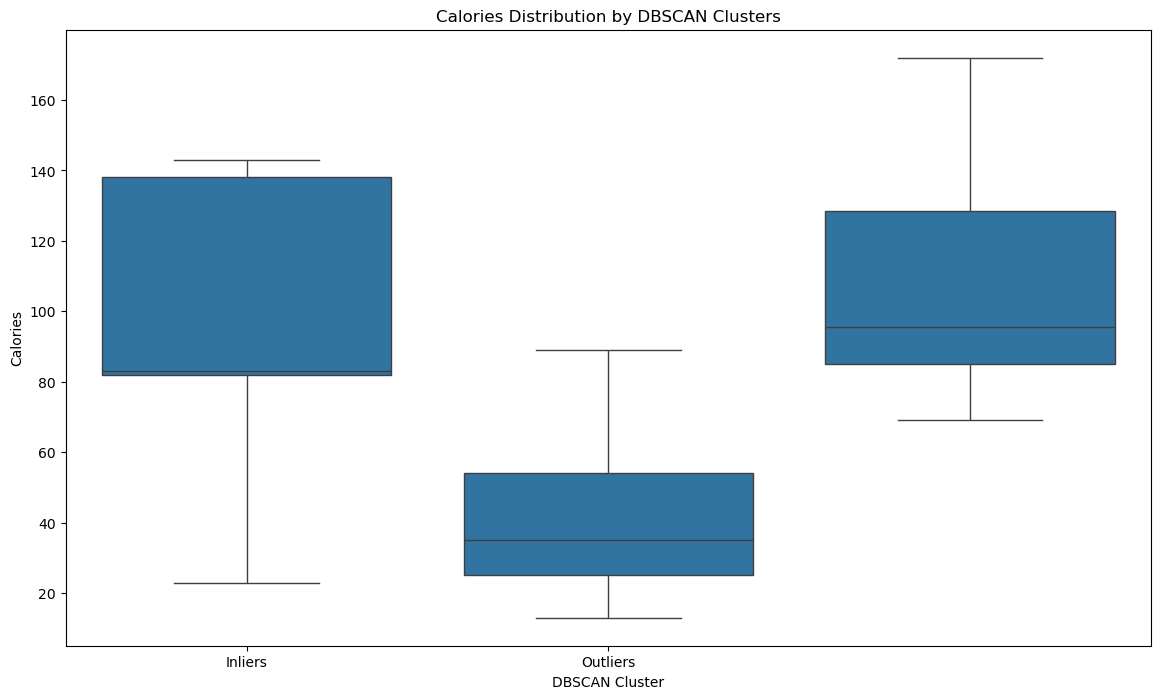

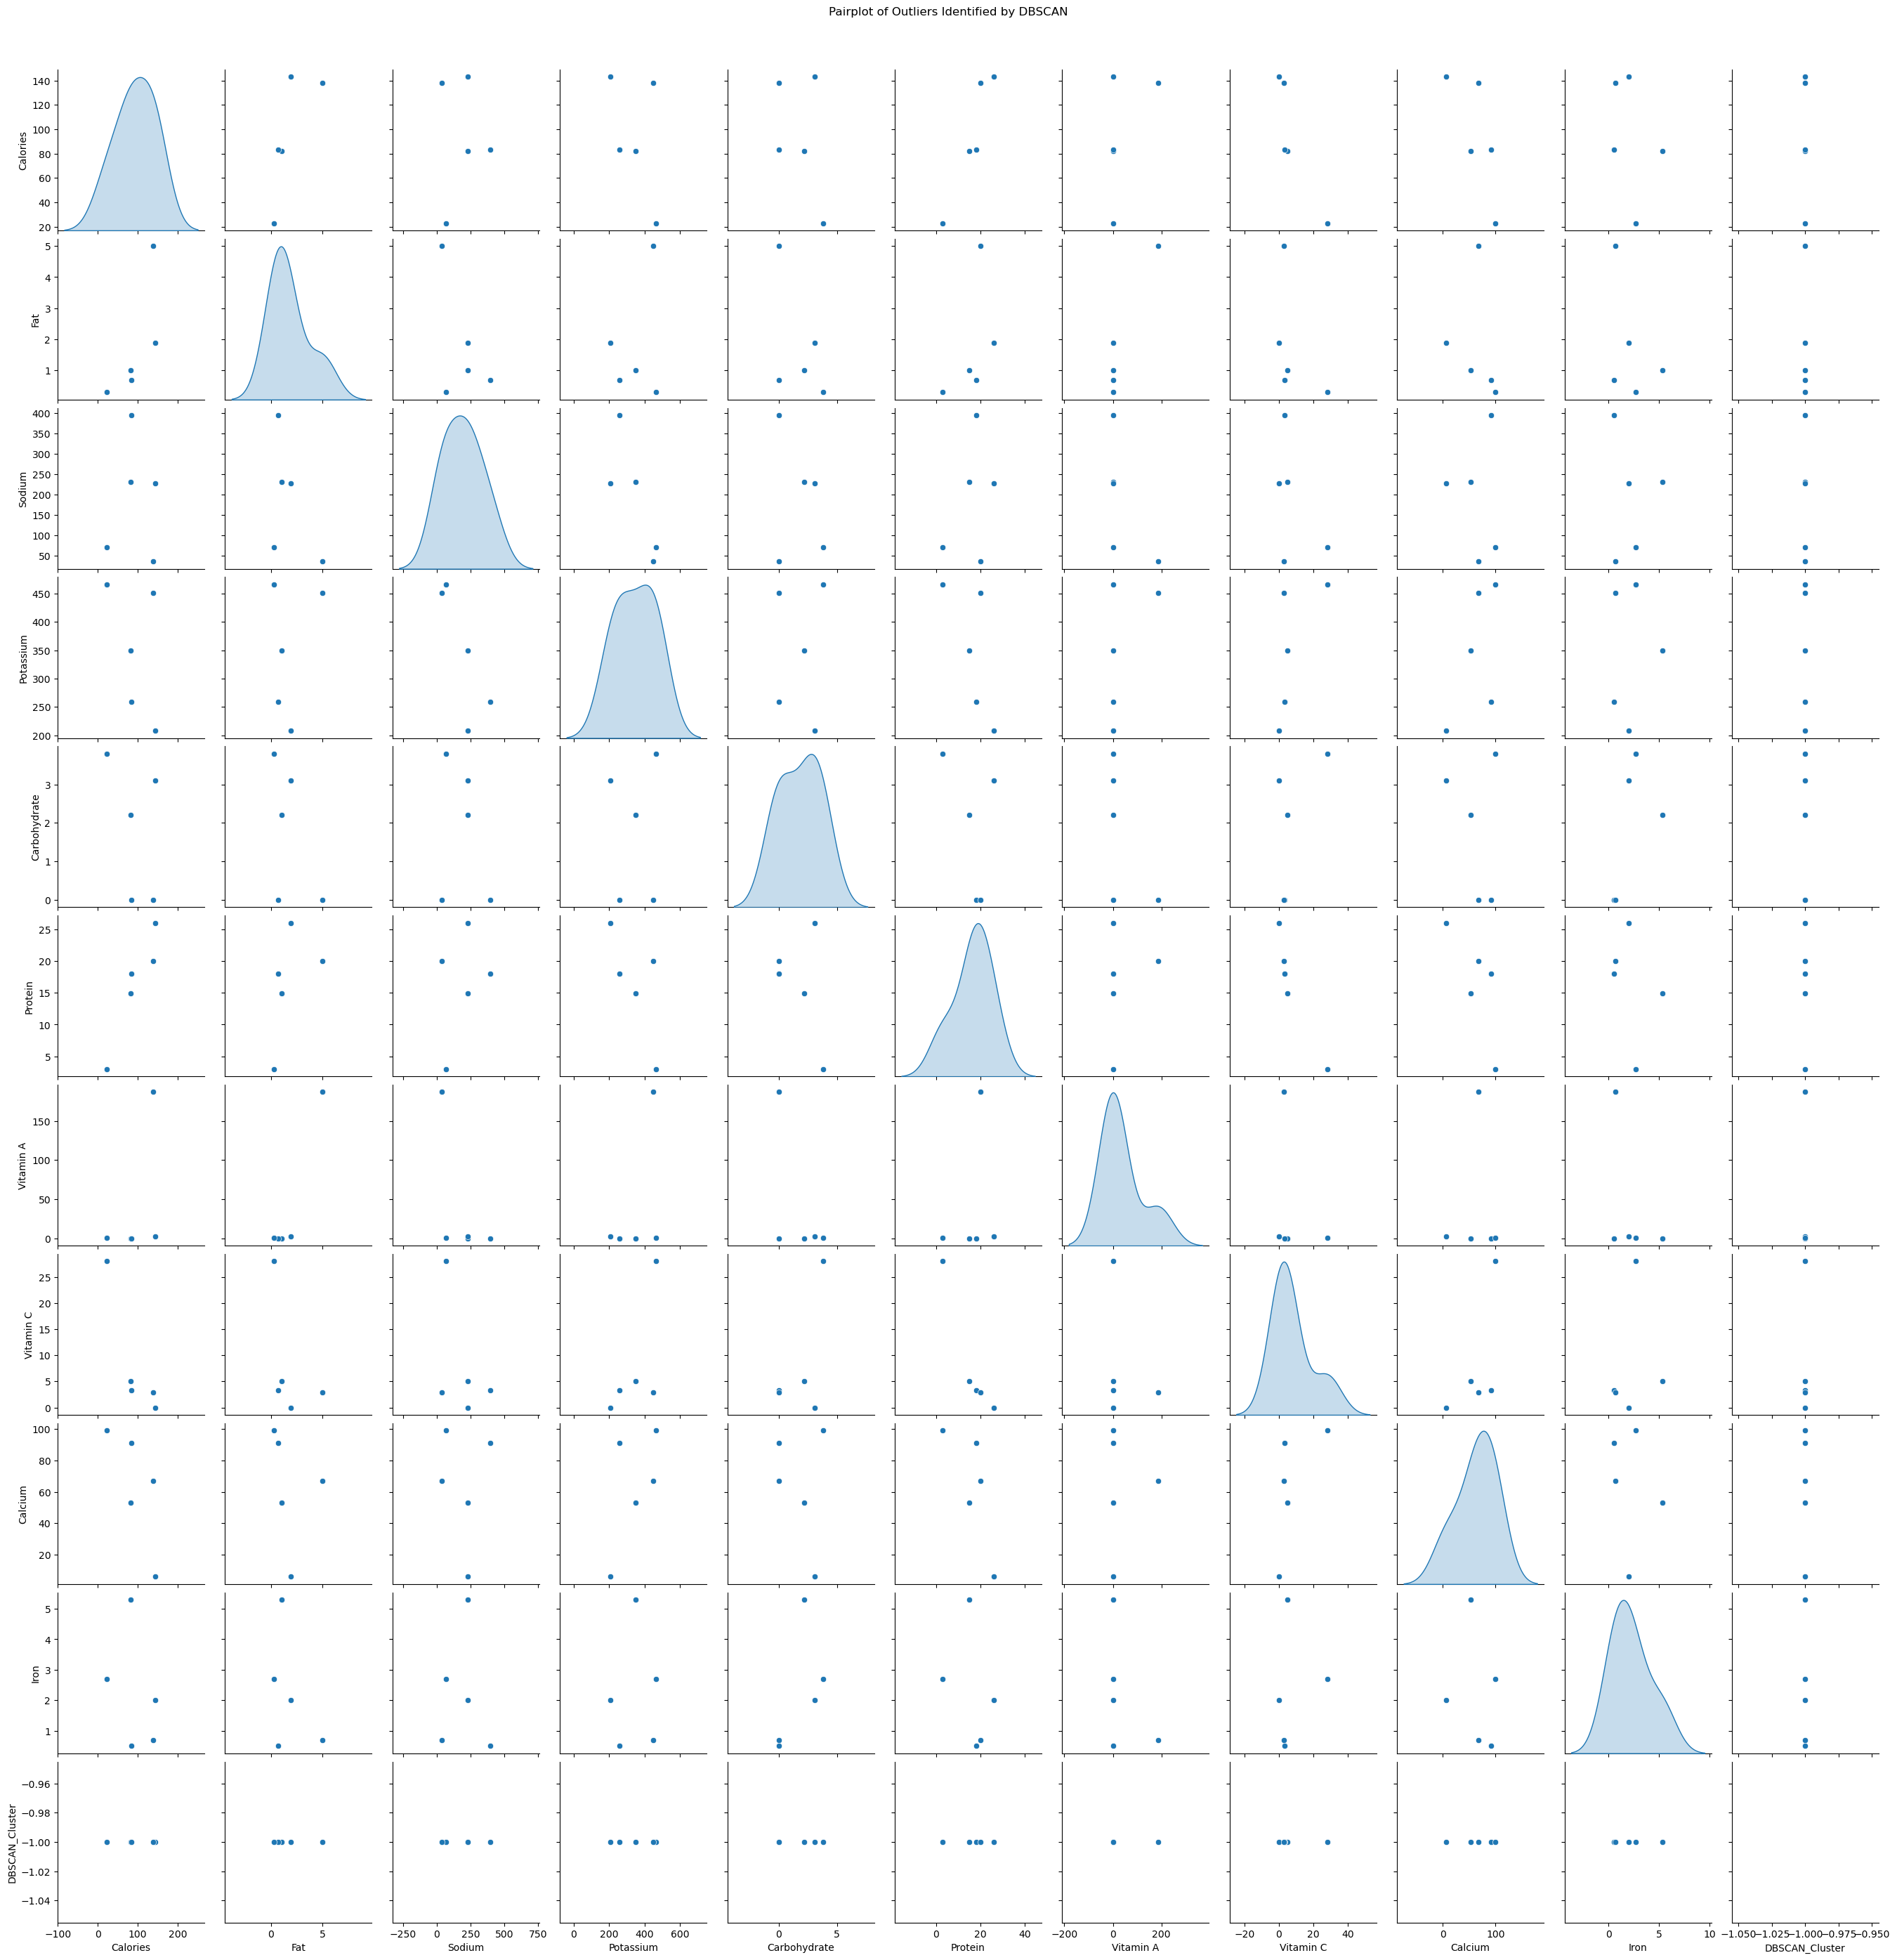

In [17]:
# type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame and 'dbscan_labels' contains the cluster labels from DBSCAN

# Add the DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Filter out the outliers (DBSCAN_Cluster = -1)
outliers = df[df['DBSCAN_Cluster'] == -1]

# Display outliers
print("Outliers identified by DBSCAN:")
print(outliers)

# Plot the nutritional values of the outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='DBSCAN_Cluster', y='Calories')
plt.title('Calories Distribution by DBSCAN Clusters')
plt.ylabel('Calories')
plt.xlabel('DBSCAN Cluster')
plt.xticks(ticks=[0, 1], labels=['Inliers', 'Outliers'])
plt.show()

# Visualizing outliers in a pairplot to compare all nutritional features
sns.pairplot(outliers, diag_kind='kde')
plt.suptitle('Pairplot of Outliers Identified by DBSCAN', y=1.02)
plt.show()


### 10. Visualize the clusters formed using hierarchical clustering and DBSCAN.

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


In [20]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)


In [21]:
linkage_matrix = linkage(df_normalized, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=1, criterion='distance')  # Adjust t as needed


In [22]:
dbscan = DBSCAN(eps=0.6, min_samples=2)
dbscan_labels = dbscan.fit_predict(df_normalized)


In [23]:
clusters_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
clusters_df['Hierarchical'] = hierarchical_labels
clusters_df['DBSCAN'] = dbscan_labels


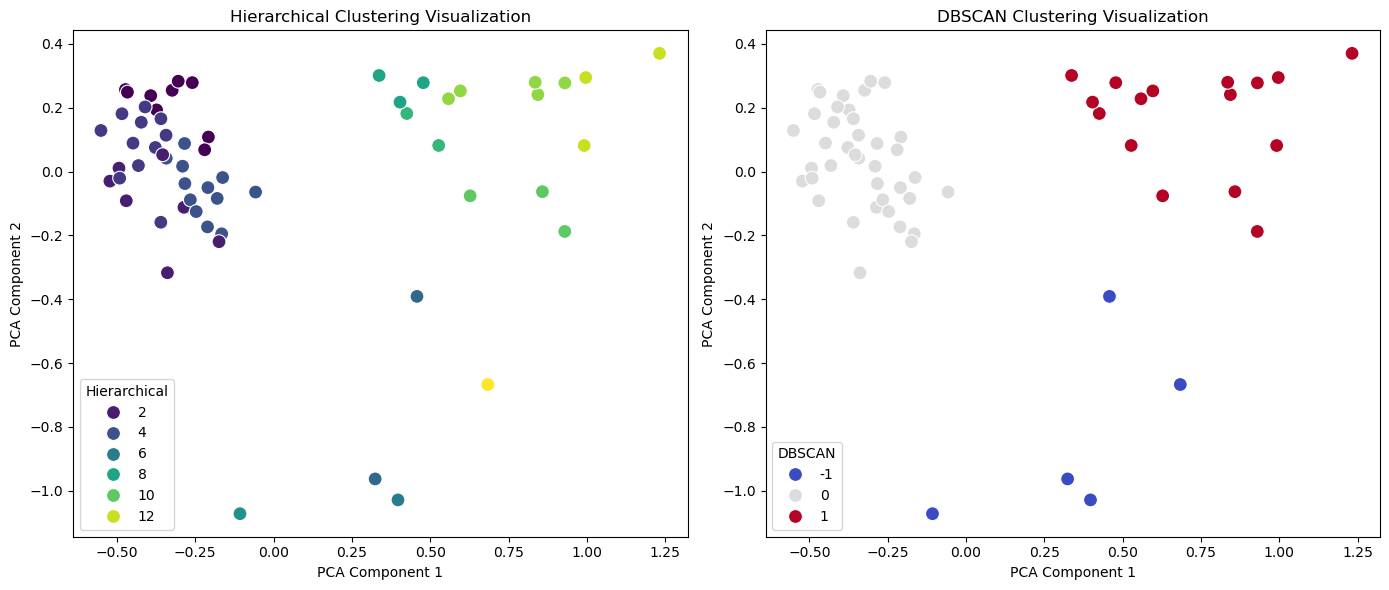

In [24]:
plt.figure(figsize=(14, 6))

# Hierarchical Clustering Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=clusters_df, x='PCA1', y='PCA2', hue='Hierarchical', palette='viridis', s=100)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# DBSCAN Clustering Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=clusters_df, x='PCA1', y='PCA2', hue='DBSCAN', palette='coolwarm', s=100)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
